### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
import ipaddress
import tensorflow as tf

### Read data

In [2]:
df = pd.read_csv("DNN-EdgeIIoT-dataset.csv")

/var/folders/_3/zbd4dqld5rjby9s9vfccxmm00000gn/T/ipykernel_85299/3820387047.py:1: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("DNN-EdgeIIoT-dataset.csv")


In [3]:
a = df.head(100)
a

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021 11:44:14.140417000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
96,2021 11:44:14.140460000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
97,2021 11:44:15.105116000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
98,2021 11:44:15.105184000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal


### Preprocessing Data

* Drop Data

In [4]:
noisy = ['frame.time', 'Attack_type', 'arp.dst.proto_ipv4', 'arp.src.proto_ipv4', 'icmp.transmit_timestamp', 'icmp.unused', 'http.tls_port', 'dns.qry.type', 'mqtt.msg_decoded_as']
df1 = df.copy()
df1 = df1.drop(noisy, axis=1)
b = df1.head(100)
b

,ip.src_host,ip.dst_host,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,http.file_data,http.content_length,http.request.uri.query,http.request.method,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
0,192.168.0.128,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
1,192.168.0.101,192.168.0.128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0
2,192.168.0.128,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
3,192.168.0.128,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
4,192.168.0.101,192.168.0.128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,192.168.0.101,192.168.0.128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
96,192.168.0.128,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
97,192.168.0.101,192.168.0.128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0
98,192.168.0.128,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0


* Encode Categorical Data

In [5]:
df2 = df1.copy()

* IP Encode

In [6]:
def ip_to_int(ip):
    try:
        ip_obj = ipaddress.ip_address(ip)
        if isinstance(ip_obj, ipaddress.IPv4Address):
            return int(ip_obj)
        else:
            return int(ip_obj._ip)
    except ValueError:
        # Bỏ qua các giá trị không phải địa chỉ IP hợp lệ
        return ip
    
df2['ip.src_host'] = df2['ip.src_host'].apply(ip_to_int)
df2['ip.dst_host'] = df2['ip.dst_host'].apply(ip_to_int)

In [7]:
df2['ip.dst_host'] = df2['ip.dst_host'].apply(lambda x: 0 if x == '0' else x)
df2['ip.src_host'] = df2['ip.src_host'].apply(lambda x: 0 if x == '0' else x)

In [8]:
df2['ip.src_host'] = df2['ip.src_host'].astype("float64")
df2['ip.dst_host'] = df2['ip.dst_host'].astype("float64")

* Feature Encode

In [9]:
x = df2.drop(['Attack_label'], axis= 1)
y = df2['Attack_label']

In [10]:
object_columns = x.select_dtypes("object").columns.to_list()
number_columns = df2.drop(object_columns, axis= 1).columns.to_list()

In [11]:
object_columns

['http.file_data',
 'http.request.uri.query',
 'http.request.method',
 'http.referer',
 'http.request.full_uri',
 'http.request.version',
 'tcp.options',
 'tcp.payload',
 'tcp.srcport',
 'dns.qry.name.len',
 'mqtt.conack.flags',
 'mqtt.msg',
 'mqtt.protoname',
 'mqtt.topic']

In [12]:
number_columns

['ip.src_host',
 'ip.dst_host',
 'arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'http.content_length',
 'http.response',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.dstport',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.port',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label']

In [13]:
print(len(number_columns))

40


In [14]:
print(len(object_columns))

14


* Encode Independent variable (X) 


In [15]:
x.head()

,ip.src_host,ip.dst_host,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,http.file_data,http.content_length,http.request.uri.query,http.request.method,...,mqtt.msg,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id
0,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
1,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1.0,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0
2,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
3,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
4,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32342e36382037362e34320d0a,3.0,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0


In [16]:
encode = ce.BaseNEncoder(cols= object_columns, return_df= True, base= 10)

In [17]:
encode.fit(x)

BaseNEncoder(base=10,
             cols=['http.file_data', 'http.request.uri.query',
                   'http.request.method', 'http.referer',
                   'http.request.full_uri', 'http.request.version',
                   'tcp.options', 'tcp.payload', 'tcp.srcport',
                   'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.msg',
                   'mqtt.protoname', 'mqtt.topic'],
             mapping=[{'col': 'http.file_data',
                       'mapping':        http.file_data_0  http.file_data_...
                       'mapping':      mqtt.conack.flags_0  mqtt.conack.flags_1
 1                     0                    1
 2                     0                    2
 3                     0                    3
 4                     0                    4
 5                     0                    5
 6                     0                    6
 7                     0                    7
 8                     0                    8
 9                     0                    9
 10                    1                    0
 11                    1                    1
 12                    1                    2
 13                    1                    3
 14                    1                    4
-1                     0                    0
-2                     0                    0},
                      {'col': 'mqtt.msg',
                       'mapping':       mqtt.msg_0  mqtt.msg_1  mqtt.msg_2
 1             0           0           1
 2             0           0           2
 3             0           0           3
 4             0           0           4
 5             0           0           5
...          ...         ...         ...
 135           1           3           5
 136           1           3           6
 137           1           3           7
-1             0           0           0
-2             0           0           0

[139 rows x 3 columns]},
                      {'col': 'mqtt.protoname',
                       'mapping':     mqtt.protoname_0
 1                 1
 2                 2
 3                 3
 4                 4
-1                 0
-2                 0},
                      {'col': 'mqtt.topic',
                       'mapping':     mqtt.topic_0
 1             1
 2             2
 3             3
 4             4
-1             0
-2             0}])

In [18]:
x = encode.transform(x)

In [19]:
x

,ip.src_host,ip.dst_host,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,http.file_data_0,http.file_data_1,http.file_data_2,http.file_data_3,...,mqtt.msg_2,mqtt.msgtype,mqtt.proto_len,mqtt.protoname_0,mqtt.topic_0,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id
0,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,1,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0
1,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,1,1.0,4.0,2,1,0.0,4.0,0.0,0.0,0.0
2,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,1,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0
3,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,1,2.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0
4,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,2,3.0,0.0,1,2,24.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,2.789975e+09,3.232236e+09,0.0,0.0,31814.0,45620.0,0,0,0,1,...,7,0.0,0.0,4,4,0.0,0.0,0.0,0.0,0.0
2219197,1.185031e+09,3.232236e+09,0.0,0.0,27718.0,45636.0,0,0,0,1,...,7,0.0,0.0,4,4,0.0,0.0,0.0,0.0,0.0
2219198,6.719652e+08,3.232236e+09,0.0,0.0,18502.0,45672.0,0,0,0,1,...,7,0.0,0.0,4,4,0.0,0.0,0.0,0.0,0.0
2219199,3.106600e+08,3.232236e+09,0.0,0.0,1862.0,45737.0,0,0,0,1,...,7,0.0,0.0,4,4,0.0,0.0,0.0,0.0,0.0


In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 83 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   ip.src_host                float64
 1   ip.dst_host                float64
 2   arp.opcode                 float64
 3   arp.hw.size                float64
 4   icmp.checksum              float64
 5   icmp.seq_le                float64
 6   http.file_data_0           int64  
 7   http.file_data_1           int64  
 8   http.file_data_2           int64  
 9   http.file_data_3           int64  
 10  http.content_length        float64
 11  http.request.uri.query_0   int64  
 12  http.request.uri.query_1   int64  
 13  http.request.uri.query_2   int64  
 14  http.request.uri.query_3   int64  
 15  http.request.method_0      int64  
 16  http.request.method_1      int64  
 17  http.referer_0             int64  
 18  http.request.full_uri_0    int64  
 19  http.request.full_uri_1    int64  
 20  ht

* Encode Dependent Variable (Y)

In [21]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
encode.fit(y)
y = encode.transform(y)

In [22]:
y1 = pd.DataFrame({"Attack_type": y})

In [23]:
y1

,Attack_type
0,0
1,0
2,0
3,0
4,0
...,...
2219196,1
2219197,1
2219198,1
2219199,1


In [24]:
out = pd.concat([x,y1], axis= 1)
out

,ip.src_host,ip.dst_host,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,http.file_data_0,http.file_data_1,http.file_data_2,http.file_data_3,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname_0,mqtt.topic_0,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_type
0,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0
1,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,1.0,4.0,2,1,0.0,4.0,0.0,0.0,0.0,0
2,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0
3,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,2.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0
4,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,3.0,0.0,1,2,24.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,2.789975e+09,3.232236e+09,0.0,0.0,31814.0,45620.0,0,0,0,1,...,0.0,0.0,4,4,0.0,0.0,0.0,0.0,0.0,1
2219197,1.185031e+09,3.232236e+09,0.0,0.0,27718.0,45636.0,0,0,0,1,...,0.0,0.0,4,4,0.0,0.0,0.0,0.0,0.0,1
2219198,6.719652e+08,3.232236e+09,0.0,0.0,18502.0,45672.0,0,0,0,1,...,0.0,0.0,4,4,0.0,0.0,0.0,0.0,0.0,1
2219199,3.106600e+08,3.232236e+09,0.0,0.0,1862.0,45737.0,0,0,0,1,...,0.0,0.0,4,4,0.0,0.0,0.0,0.0,0.0,1


In [25]:
c = out.head(100)
c

,ip.src_host,ip.dst_host,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,http.file_data_0,http.file_data_1,http.file_data_2,http.file_data_3,...,mqtt.msgtype,mqtt.proto_len,mqtt.protoname_0,mqtt.topic_0,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_type
0,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0
1,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,1.0,4.0,2,1,0.0,4.0,0.0,0.0,0.0,0
2,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0
3,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,2.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0
4,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,3.0,0.0,1,2,24.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0
96,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0
97,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0
98,3.232236e+09,3.232236e+09,0.0,0.0,0.0,0.0,0,0,0,1,...,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0


### Scaling Data

In [26]:
x1 = x.columns

In [27]:
len(x1)

83

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [29]:
x

array([[ 0.42719559,  0.48199816, -0.04856282, ..., -0.00758269,
        -0.007155  , -0.00683781],
       [ 0.42719557,  0.48199818, -0.04856282, ..., -0.00758269,
        -0.007155  , -0.00683781],
       [ 0.42719559,  0.48199816, -0.04856282, ..., -0.00758269,
        -0.007155  , -0.00683781],
       ...,
       [-1.83377578,  0.48199818, -0.04856282, ..., -0.00758269,
        -0.007155  , -0.00683781],
       [-2.15284392,  0.48199818, -0.04856282, ..., -0.00758269,
        -0.007155  , -0.00683781],
       [-1.20225854,  0.48199818, -0.04856282, ..., -0.00758269,
        -0.007155  , -0.00683781]])

In [30]:
x.shape

(2219201, 83)

In [31]:
out1 = pd.DataFrame({x1[i]: x[i] for i in range(len(x1))})

In [32]:
d = out1.head(100)
d

,ip.src_host,ip.dst_host,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,http.file_data_0,http.file_data_1,http.file_data_2,http.file_data_3,...,mqtt.msg_2,mqtt.msgtype,mqtt.proto_len,mqtt.protoname_0,mqtt.topic_0,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id
0,0.427196,0.427196,0.427196,0.427196,0.427196,0.427196,0.427196,0.427196,0.427196,0.427196,...,0.427196,0.427196,0.427196,0.427196,0.427196,0.427196,0.427196,0.427196,0.427196,0.427196
1,0.481998,0.481998,0.481998,0.481998,0.481998,0.481998,0.481998,0.481998,0.481998,0.481998,...,0.481998,0.481998,0.481998,0.481998,0.481998,0.481998,0.481998,0.481998,0.481998,0.481998
2,-0.048563,-0.048563,-0.048563,-0.048563,-0.048563,-0.048563,-0.048563,-0.048563,-0.048563,-0.048563,...,-0.048563,-0.048563,-0.048563,-0.048563,-0.048563,-0.048563,-0.048563,-0.048563,-0.048563,-0.048563
3,-0.051428,-0.051428,-0.051428,-0.051428,-0.051428,-0.051428,-0.051428,-0.051428,-0.051428,-0.051428,...,-0.051428,-0.051428,-0.051428,-0.051428,-0.051428,-0.051428,-0.051428,-0.051428,-0.051428,-0.051428
4,-0.202928,-0.202928,-0.202928,-0.202928,-0.202928,-0.202928,-0.202928,-0.202928,-0.202928,-0.202928,...,-0.202928,-0.202928,-0.202928,-0.202928,-0.202928,-0.202928,-0.202928,-0.202928,-0.202928,-0.202928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,-0.197134,-0.197134,-0.197134,-0.197134,5.072692,-0.197134,-0.197134,-0.197134,-0.197134,-0.197134,...,-0.197134,-0.197134,-0.197134,-0.197134,-0.197134,-0.197134,-0.197134,-0.197134,-0.197134,-0.197134
79,-0.197157,5.072089,-0.197157,-0.197157,-0.197157,-0.197157,-0.197157,-0.197157,-0.197157,-0.197157,...,-0.197157,-0.197157,-0.197157,-0.197157,-0.197157,-0.197157,-0.197157,-0.197157,-0.197157,-0.197157
80,-0.007583,-0.007583,-0.007583,-0.007583,-0.007583,-0.007583,-0.007583,-0.007583,-0.007583,-0.007583,...,-0.007583,-0.007583,-0.007583,-0.007583,-0.007583,-0.007583,-0.007583,-0.007583,-0.007583,-0.007583
81,-0.007155,-0.007155,-0.007155,-0.007155,-0.007155,-0.007155,-0.007155,-0.007155,-0.007155,-0.007155,...,-0.007155,-0.007155,-0.007155,-0.007155,-0.007155,-0.007155,-0.007155,-0.007155,-0.007155,-0.007155


In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)  # Chọn số thành phần chính mong muốn
x_pca = pca.fit_transform(x)
principal_components = pca.fit_transform(out1)

In [34]:
e = principal_components[:100]

In [35]:
e = pd.DataFrame(e)

In [36]:
e

,0,1,2,3,4,5,6,7,8,9
0,4.239568,-2.533173,1.999083,0.197804,0.346699,1.406019,-0.722980,-0.026089,-0.390895,-0.159295
1,4.659513,-2.731004,2.137283,0.216512,0.374220,1.506186,-0.769019,-0.030790,-0.417559,-0.168363
2,0.593901,-0.815738,0.799323,0.035391,0.107787,0.536444,-0.323294,0.014720,-0.159424,-0.080566
3,0.571943,-0.805395,0.792097,0.034413,0.106348,0.531207,-0.320887,0.014966,-0.158030,-0.080092
4,-0.588980,-0.258496,0.410046,-0.017306,0.030270,0.254300,-0.193612,0.027962,-0.084320,-0.055021
...,...,...,...,...,...,...,...,...,...,...
78,3.259926,-2.436554,-3.863512,9.678739,1.459053,-1.090077,0.870813,-1.139591,0.702658,0.448075
79,7.207800,8.411425,0.801735,-1.255704,0.407177,-0.615377,0.378809,-0.158723,0.232019,0.035557
80,0.907925,-0.963672,0.902666,0.049381,0.128366,0.611347,-0.357722,0.011205,-0.179362,-0.087347
81,0.911203,-0.965216,0.903744,0.049527,0.128581,0.612128,-0.358081,0.011169,-0.179570,-0.087418


In [37]:
# import pandas as pd

# # Tạo một đối tượng ExcelWriter để ghi vào một file Excel
# with pd.ExcelWriter('main.xlsx') as writer:
#     # Ghi DataFrame đầu tiên vào sheet có tên là 'Sheet1'
#     a.to_excel(writer, sheet_name='Dữ Liệu Gốc', index=False)
#     b.to_excel(writer, sheet_name='Sau lựa chọn', index=False)
#     c.to_excel(writer, sheet_name='Sau mã hóa', index=False)
#     d.to_excel(writer, sheet_name='Sau chuẩn hóa', index=False)
#     # Ghi DataFrame thứ hai vào sheet có tên là 'Sheet2'
#     e.to_excel(writer, sheet_name='Sau PCA', index=False)


In [38]:
y 

array([0, 0, 0, ..., 1, 1, 1])

### Spliting Data

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_val_test, y_train, y_val_test = train_test_split(x_pca, y, test_size= 0.2, random_state= 42, shuffle= True, stratify= y)
x_test, x_val, y_test, y_val = train_test_split(x_val_test, y_val_test, test_size= 0.5, random_state= 42, stratify= y_val_test)

In [40]:
x.shape, y.shape

((2219201, 83), (2219201,))

In [41]:
x_train.shape, y_train.shape

((1775360, 10), (1775360,))

In [42]:
x_val.shape, y_val.shape

((221921, 10), (221921,))

In [43]:
x_test.shape, y_test.shape

((221920, 10), (221920,))

### Training Deep Neural Network Model

In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
# import tensorflow_addons as tfa
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

# from focal_loss import SparseCategoricalFocalLoss, sparse_categorical_focal_loss
# Xử lý lại chia train test với tấn công nhỏ

from tensorflow.keras import layers
from tensorflow.keras import regularizers

from datetime import datetime
from keras.regularizers import l2

In [45]:
md1 = Sequential()

md1.add(Dense(256,activation='relu'))
md1.add(Dropout(0.3))
# md1.add(BatchNormalization())

md1.add(Dense(128,activation='relu'))
md1.add(Dropout(0.3))
# md1.add(BatchNormalization())

md1.add(Dense(64,activation='relu'))
md1.add(Dropout(0.3))
# md1.add(BatchNormalization())

md1.add(Dense(32,activation='relu'))
md1.add(Dropout(0.3))
# md1.add(BatchNormalization())
#chu ý: 
md1.add(Dense(1, activation='sigmoid'))

md1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Algorithms 
# Stop training when the validation loss metric has stopped decreasing for 5 epochs.
#Callback1
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, mode = 'min', restore_best_weights = True) 

# Save the model with the minimum validation loss 
#Callback2
#Save best model
checkpoint = ModelCheckpoint('best_model.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True) 

# Reduce learning rate 
#Giảm tỉ lệ học tập khi không cải thiện loss
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, min_lr = 0.00001, mode = 'min', verbose = 1)

# Tính toán trọng số của các lớp dựa trên số lượng mẫu của mỗi lớp
class_weight = {}
total = len(y_train)
num_class = {0: 17901, 1: 35936, 2: 83834, 3: 36045, 4: 87529, 5: 721, 6: 874, 7: 1163262, 8: 36110, 9: 16246, 10: 7866, 11: 36867, 12: 27096, 13: 36079, 14: 11458}
for i in num_class.keys():
    class_weight[i] = total/(15.0*num_class[i])




In [46]:
#fit model
import time
start = time.time()
print('program start...')

history = md1.fit(x_train, y_train, epochs = 30, batch_size = 512, validation_data=(x_val, y_val), class_weight = class_weight, verbose=1)

#time
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

#  "Accuracy"


program start...
Epoch 1/30
3468/3468 [==============================] - 12s 3ms/step - loss: 0.0115 - accuracy: 0.9994 - val_loss: 1.7913e-09 - val_accuracy: 1.0000
Epoch 2/30
3468/3468 [==============================] - 13s 4ms/step - loss: 1.3556e-04 - accuracy: 1.0000 - val_loss: 6.4599e-11 - val_accuracy: 1.0000
Epoch 3/30
3468/3468 [==============================] - 14s 4ms/step - loss: 8.2336e-06 - accuracy: 1.0000 - val_loss: 2.3125e-12 - val_accuracy: 1.0000
Epoch 4/30
3468/3468 [==============================] - 13s 4ms/step - loss: 3.8566e-07 - accuracy: 1.0000 - val_loss: 1.4320e-14 - val_accuracy: 1.0000
Epoch 5/30
3468/3468 [==============================] - 13s 4ms/step - loss: 3.5084e-08 - accuracy: 1.0000 - val_loss: 5.9973e-16 - val_accuracy: 1.0000
Epoch 6/30
3468/3468 [==============================] - 13s 4ms/step - loss: 2.4797e-09 - accuracy: 1.0000 - val_loss: 9.1667e-17 - val_accuracy: 1.0000
Epoch 7/30
3468/3468 [==============================] - 13s 4ms/step 

In [47]:
md1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

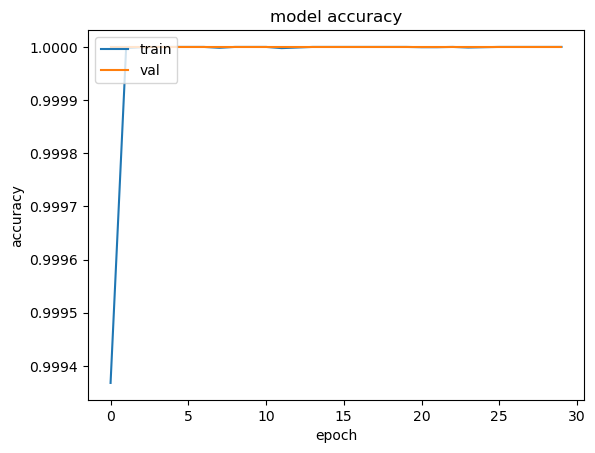

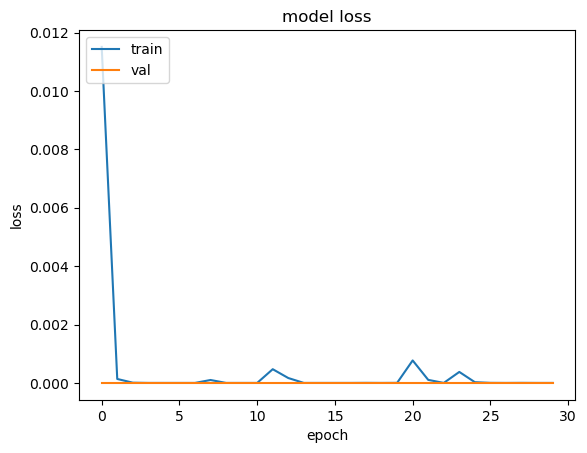

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [49]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep

In [50]:
y_pred = md1.predict(x_test).reshape(-1,)

6935/6935 [==============================] - 3s 360us/step


In [51]:
y_test.shape, y_pred.shape

((221920,), (221920,))

In [52]:
y_pred = np.array(y_pred, dtype='int32')

In [53]:
accuracy_score(y_test, y_pred)   

1.0

In [54]:
precision_score(y_test, y_pred)

1.0

In [55]:
f1_score_rep(y_test, y_pred)

1.0

In [56]:
recall_score(y_test, y_pred)

1.0

In [57]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(20, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks([0, 1], ['Class 0', 'Class 1'])
    plt.yticks([0, 1], ['Class 0', 'Class 1'])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

6935/6935 [==============================] - 3s 392us/step


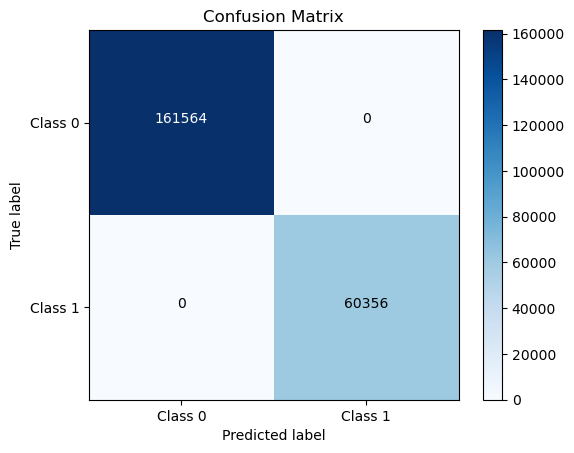

In [60]:
y_pred = md1.predict(x_test)
plot_confusion_matrix(y_test, y_pred)

Dự đoán phát hiện tấn công

In [58]:
import random as rd
eg = rd.randint(0, x_test.shape[0])
x_eg = x_test[eg]
y_eg = y_test[eg]
x_eg = np.expand_dims(x_eg, axis=0)
y_predict = md1.predict(x_eg)
label_predict = int(y_predict[0])
print("Giá trị dự đoán: ", label_predict)
print("Giá trị thực tế: ", y_eg)
if label_predict == y_eg & label_predict == 0:
    print("Không bị tấn công")
elif label_predict == y_eg & label_predict == 1:
    print("Bị tấn công")
else:
    print("Phát hiện sai")


1/1 [==============================] - 0s 55ms/step
Giá trị dự đoán:  1
Giá trị thực tế:  1
Bị tấn công


/var/folders/_3/zbd4dqld5rjby9s9vfccxmm00000gn/T/ipykernel_85299/4050694014.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_predict = int(y_predict[0])
